**Autores:**
- Carolina Naranjo.
- Daniel Guzman.
- Johana Castillo.
- Juan Martin Pastuso Borda.

### Actividad: Análisis Univariado de una Variable en un Conjunto de Datos

**Pregunta SMART**
- ¿Cómo podemos identificar y clasificar a clientes del mercado regulado con anomalías en el consumo de energía, utilizando datos históricos de consumo y características socioeconómicas, con el fin de reducir las pérdidas y facilitar un monitoreo continuo en el tiempo?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis # estadisticas para coef asimetria, coef kurtosis

Base de datos del mercado regulado del sector energetico:

In [ ]:

df = pd.read_csv('Regulados_historico.csv')
df.drop(columns=['Unnamed: 0', 'CON_CONSUMO', 'CONSUMO_RECUPERADO_KWH'], inplace=True, )
df.head()

,NIU,PERIODO,DIAS_FACT,TIPO_LECTURA,CONSUMO_USUARIO_KWH2,TIPO_MEDIDOR,NIVELTENSION,ESTRATO
0,100,2021-01,31.0,Real,239.0,Electromecánico,Nivel 1,Bajo-bajo
1,100,2021-02,32.0,Real,238.0,Electromecánico,Nivel 1,Bajo-bajo
2,100,2021-03,30.0,Real,272.0,Electromecánico,Nivel 1,Bajo-bajo
3,100,2021-04,29.0,Real,292.0,Electromecánico,Nivel 1,Bajo-bajo
4,100,2021-05,31.0,Real,304.0,Electromecánico,Nivel 1,Bajo-bajo


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33234494 entries, 0 to 33234493
Data columns (total 8 columns):
 #   Column                Dtype  
---  ------                -----  
 0   NIU                   int64  
 1   PERIODO               object 
 2   DIAS_FACT             float64
 3   TIPO_LECTURA          object 
 4   CONSUMO_USUARIO_KWH2  float64
 5   TIPO_MEDIDOR          object 
 6   NIVELTENSION          object 
 7   ESTRATO               object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.0+ GB


In [45]:
df.isnull().sum()

NIU                       0
PERIODO                   0
DIAS_FACT                 0
TIPO_LECTURA              0
CONSUMO_USUARIO_KWH2      0
TIPO_MEDIDOR              0
NIVELTENSION            330
ESTRATO                 330
dtype: int64

Funciones para obtener un análisis estadístico mas completo:

In [4]:
def tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean() # Coeficiente variación
    tabla_descriptivas.loc['skew']=skew(columnas) # coeficiente de asimetria
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas) # coeficiente de curtosis.
    return tabla_descriptivas

## Función para construir tablas de frecuencias
def tabla_freq(columna):
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

### Análisis univariado del dataset:

Las variables seleccionadas son del tipo cualitativo, lo que significa que no tiene un valor numérico o una escala cuantitativa que permita hacer comparaciones directas o análisis estadísticos que identifiquen patrones de manera clara. Por tanto, al ser categórica, se presenta un análisis que muestre la distribución de cada categoría para identificar el tipo de captura de información.


#### Variable seleccionada: 'TIPO_LECTURA'.

- Importancia de la variable: Esta variable es clave dentro del conjunto de datos, ya que define el tipo de lectura utilizada para medir el consumo de energía con fines de liquidación. Además, permite determinar con precisión cuánta energía se registra de manera real, si el consumo es estimado y si se cuenta con un medidor para realizar la captura de datos.

In [23]:
# Tipo lectura

tabla_tipo_lectura = tabla_freq(df['TIPO_LECTURA']).sort_values(by='Frec. Abs.', ascending=False)
tabla_tipo_lectura

col_0,TIPO_LECTURA,Frec. Abs.,Frec. Rel.
2,Real,31391601,0.944549
0,Estimada,1436187,0.043214
1,No tiene medidor,406706,0.012237


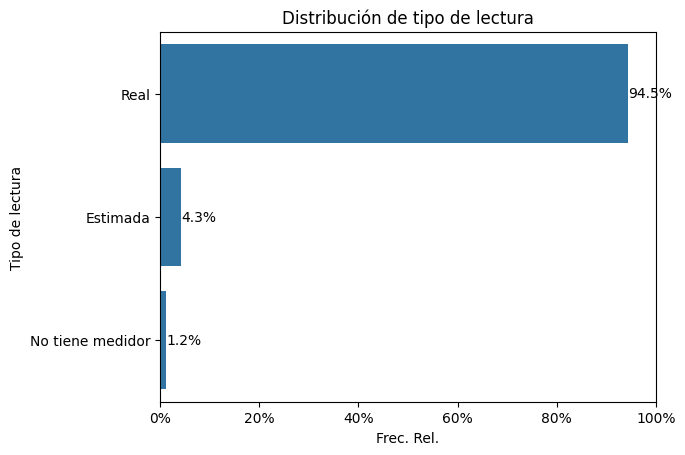

In [51]:

tipo_lectura=sns.barplot(y=tabla_tipo_lectura['TIPO_LECTURA'],x=tabla_tipo_lectura["Frec. Rel."]*100)
tipo_lectura.bar_label(tipo_lectura.containers[0], label_type='edge',fmt='%.1f%%') # visualizar porcentajes por barra
tipo_lectura.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) # Visualizar eje y en mi escala porcentajes
tipo_lectura.set(xlim=(0, 100))
tipo_lectura.set_ylabel('Tipo de lectura')
tipo_lectura.set_title('Distribución de tipo de lectura')
plt.show() 

**Conclusión:** La confiabilidad del sistema de medición es alta, dado que más del 94% de las lecturas son reales, es decir, se están realizando directamente en el sitio de consumo. Sin embargo, la presencia de lecturas estimadas y clientes sin medidor, aunque baja, debe ser monitoreada para minimizar errores y asegurar una correcta facturación del consumo energético.

#### Variable: 'TIPO_MEDIDOR'.

- Importancia de la variable: En el mercado de energía actualmente predominan los medidores electromecánicos (convencionales). Esto sugiere que esta variable podría aportar información relevante sobre posibles anomalías en la captura del consumo de energía, debido a las limitaciones tecnológicas y a posibles errores en la medición. Su análisis es clave para determinar qué tipo de medidor ofrece mayor confiabilidad en la facturación y detección de inconsistencias.


In [26]:
# TIPO MEDIDOR
tabla_tipo_medidor = tabla_freq(df['TIPO_MEDIDOR']).sort_values(by='Frec. Abs.', ascending=False)
tabla_tipo_medidor


col_0,TIPO_MEDIDOR,Frec. Abs.,Frec. Rel.
0,Electromecánico,27854620,0.838124
3,I. Unidireccional,2681526,0.080685
1,Electrónico,2253119,0.067795
4,U. Sin Medidor,411457,0.012380
2,I. Bidireccional,33772,0.001016


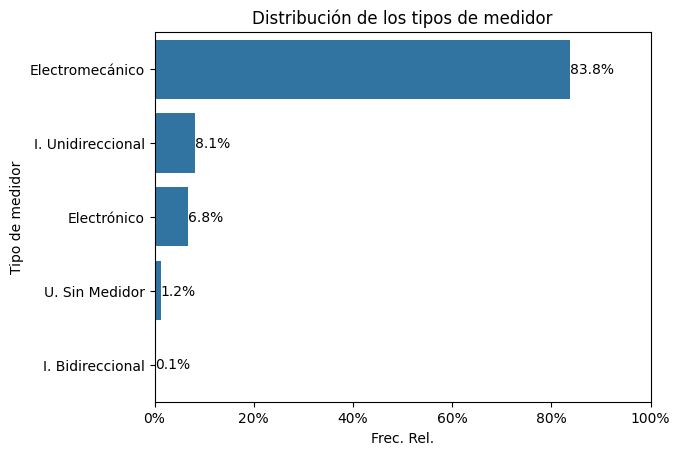

In [52]:
tipo_medidor=sns.barplot(y=tabla_tipo_medidor['TIPO_MEDIDOR'],x=tabla_tipo_medidor["Frec. Rel."]*100)
tipo_medidor.bar_label(tipo_medidor.containers[0], label_type='edge',fmt='%.1f%%') # visualizar porcentajes por barra
tipo_medidor.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) # Visualizar eje y en mi escala porcentajes
tipo_medidor.set(xlim=(0, 100))
tipo_medidor.set_ylabel('Tipo de medidor')
tipo_medidor.set_title('Distribución de los tipos de medidor')
plt.show() 

**Conclusión:** De acuerdo con la gráfica, más del 80% de las capturas de datos se realizan mediante medidores electromecánicos, lo que indica una fuerte dependencia de tecnología convencional. Esto puede representar limitaciones en términos de precisión. Además, al no permitir supervisión en tiempo real, estos medidores pueden retrasar la identificación de irregularidades, lo que aumenta el riesgo de pérdidas y fraudes. Además, La baja presencia de medidores electrónicos y bidireccionales sugiere oportunidades de modernización que podrían mejorar la eficiencia del monitoreo y la gestión del consumo energético.

#### Proximos pasos:

Realizar un análisis bivariado para examinar cómo se distribuyen los consumos según el tipo de medidor y la lectura del consumo. Esto permitira identificar patrones de consumo en función de estas variables para detectar posibles anomalías. Además, se debe evaluar la relación entre el consumo y las características socioeconómicas para mejorar el monitoreo y la prevención de fraudes.
